<a href="https://colab.research.google.com/github/Preetraj2002/Customer_Review_Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 0 : Read in Data and NTKL Basics

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Import files from Google drive to colab

In [ ]:
!gdown --id 1iXxT5XszWKJhp0QiNYGmSRJownpyXEkE

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1iXxT5XszWKJhp0QiNYGmSRJownpyXEkE
To: /content/Reviews.csv
100% 301M/301M [00:02<00:00, 146MB/s]


Read in data

In [ ]:
df = pd.read_csv("Reviews.csv")
print(df.shape)
#cutting down the size
df = df.head(500)
print(df.shape)
print(df)


(568454, 10)
(500, 10)
      Id   ProductId          UserId                      ProfileName  \
0      1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1      2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2      3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3      4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4      5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
..   ...         ...             ...                              ...   
495  496  B000G6RYNE   APGAA43E3WPN7                           Darren   
496  497  B000G6RYNE    ABR7HU5H1KNE                            Keith   
497  498  B000G6RYNE   AJQD2WWJYOYFQ                          bubbles   
498  499  B000G6RYNE  A16YH487W9ZYO0                 Bruce G. Lindsay   
499  500  B000G6RYNE   A83YQC1XOU4CS                         J. Baker   

     HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                       1   


Quick EDA


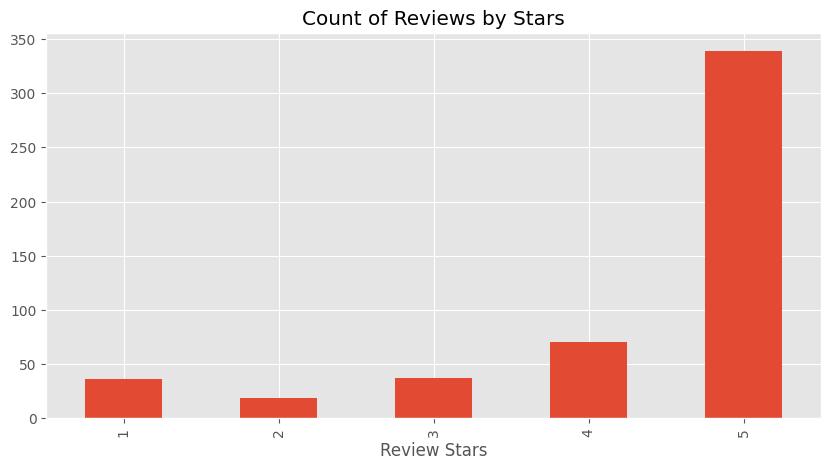

In [ ]:
ax = df['Score'].value_counts().sort_index()\
    .plot(kind='bar',
          title="Count of Reviews by Stars",
          figsize = (10,5))
ax.set_xlabel("Review Stars")
plt.show()



Basic NLTK


In [ ]:
example = df["Text"][10]
print(example)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'do', "n't", 'know', 'if', 'it', "'s", 'the', 'cactus', 'or']

Tagging every word(token) with Part of Speech

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download("words")
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC
  the/DT
  tequila/NN
  or/CC
  just/RB
  the/DT
  unique/JJ
  combination/NN
  of/IN
  ingredients/NNS
  ,/,
  but/CC
  the/DT
  flavour/NN
  of/IN
  this/DT
  hot/JJ
  sauce/NN
  makes/VBZ
  it/PRP
  one/CD
  of/IN
  a/DT
  kind/NN
  !/.
  We/PRP
  picked/VBD
  up/RP
  a/DT
  bottle/NN
  once/RB
  on/IN
  a/DT
  trip/NN
  we/PRP
  were/VBD
  on/IN
  and/CC
  brought/VBD
  it/PRP
  back/RP
  home/NN
  with/IN
  us/PRP
  and/CC
  were/VBD
  totally/RB
  blown/VBN
  away/RB
  !/.
  When/WRB
  we/PRP
  realized/VBD
  that/IN
  we/PRP
  simply/RB
  could/MD
  n't/RB
  find/VB
  it/PRP
  anywhere/RB
  in/IN
  our/PRP$
  city/NN
  we/PRP
  were/VBD
  bummed./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Now/RB
  ,/,
  because/IN
  of/IN
  the/DT
  magic/NN
  of/IN
  the/DT
  internet/NN
  ,/,
  we/PRP
  have/VBP
  a/DT
  case/NN
  of/IN
  the/DT
  sauce/NN
  and/CC
  are/VBP


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


#Step 1: VADER Seniment Scoring
(Valence Aware Dictionary for Sentiment Reasoning). Doesn't analysis relations between words but look at the word as +ve/-ve or neu to predict the sentiment.
Here we use Bag of Word Approach

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

Run the polarity score on the entire dataset

In [ ]:
res = {} # dict to store polarity score
for i, row in tqdm(df.iterrows(),total = len(df)):
  text = row["Text"]
  myid = row["Id"]
  res[myid] = sia.polarity_scores(text)
  


100%|██████████| 500/500 [00:00<00:00, 1153.48it/s]


In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
# rename so that we can merge it to our original df
vaders = vaders.merge(df, how='left')
# Now this df contains sentiment scores and metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


# Plot the VADER results
Let's test weather positive reviews are co-related to higher stars

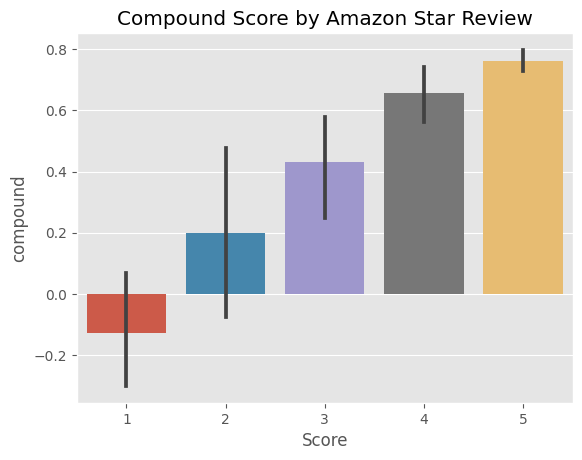

In [ ]:
ax = sns.barplot(data=vaders, x = 'Score', y = "compound")
ax.set_title("Compound Score by Amazon Star Review")
plt.show()

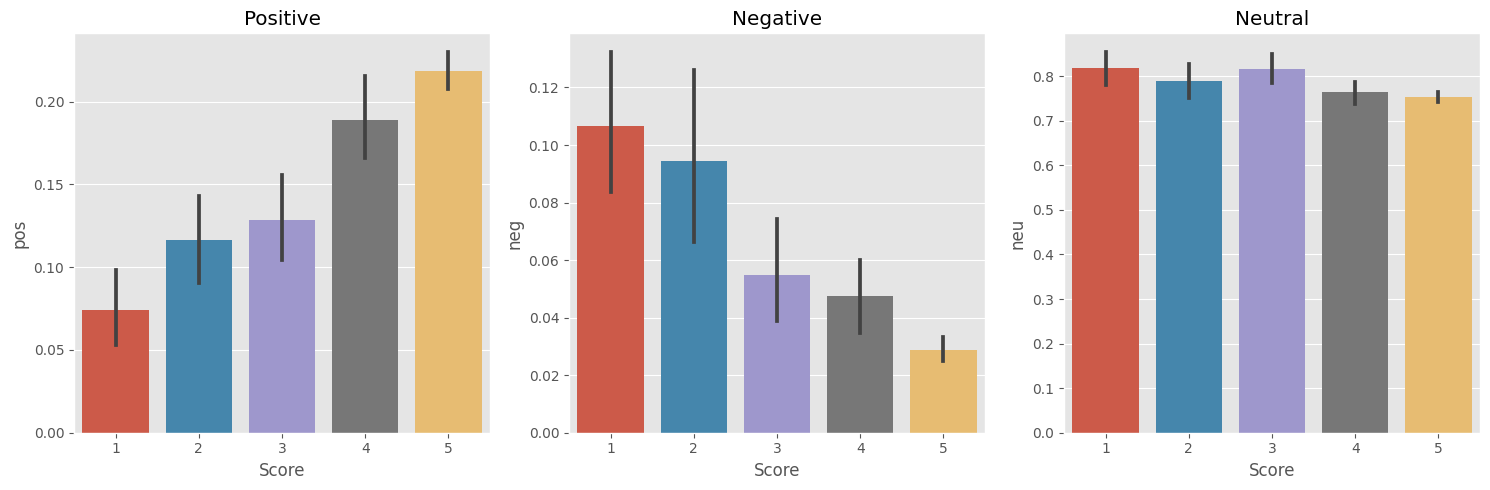

In [ ]:
fig,axs = plt.subplots(1,3,figsize= (15,5))
sns.barplot(data=vaders,x = "Score", y = 'pos',ax= axs[0])
sns.barplot(data=vaders,x = "Score", y = 'neg',ax= axs[1])
sns.barplot(data=vaders,x = "Score", y = "neu",ax= axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Negative")
axs[2].set_title("Neutral")
plt.tight_layout()
plt.show()